In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.metrics import  roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
import warnings
warnings.filterwarnings('ignore')

# Stroke probability classification

### Import Dataset

In [3]:
address = r'/Users/nnussbaum/Ariel/Year 1 - 1/healthcare-dataset-stroke-data.csv'
df=pd.read_csv(address)
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Attribute Information

 id: unique identifier

 gender: "Male", "Female" or "Other"

 age: age of the patient

 hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

 heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
 
 ever_married: "No" or "Yes"
 
 work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
 
 Residence_type: "Rural" or "Urban"
 
 avg_glucose_level: average glucose level in blood
 
 bmi: body mass index
 
 smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
 
 stroke: 1 if the patient had a stroke or 0 if not
 
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Remove the ID column as it has no significance


In [6]:
df=df.drop(labels='id', axis = 1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Replace object values with numeric values

In [7]:
labelencoder = LabelEncoder()
df['smoking_status'] = labelencoder.fit_transform(df['smoking_status'])
df['work_type'] = labelencoder.fit_transform(df['work_type'])
df['gender']=pd.get_dummies(df['gender'])
df['ever_married']=pd.get_dummies(df['ever_married'])
df['Residence_type']=pd.get_dummies(df['Residence_type'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,2,0,228.69,36.6,1,1
1,1,61.0,0,0,0,3,1,202.21,NaN,2,1
2,0,80.0,0,1,0,2,1,105.92,32.5,2,1
3,1,49.0,0,0,0,2,0,171.23,34.4,3,1
4,1,79.0,1,0,0,3,1,174.12,24.0,2,1


### Remove NaN values

Let's check for null values

In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Let's replace the NaN values with the BMI mean value

In [9]:
med = df['bmi'].mean()
df.bmi.fillna(med, inplace = True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,2,0,228.69,36.600000,1,1
1,1,61.0,0,0,0,3,1,202.21,28.893237,2,1
2,0,80.0,0,1,0,2,1,105.92,32.500000,2,1
3,1,49.0,0,0,0,2,0,171.23,34.400000,3,1
4,1,79.0,1,0,0,3,1,174.12,24.000000,2,1


Let's check how many people in the data set have had strokes

In [10]:
d = df['stroke']==1
print(d.value_counts())
print(249/5109*100,"% has had strokes")

False    4861
True      249
Name: stroke, dtype: int64
4.873752201996477 % has had strokes


## Correlation chart

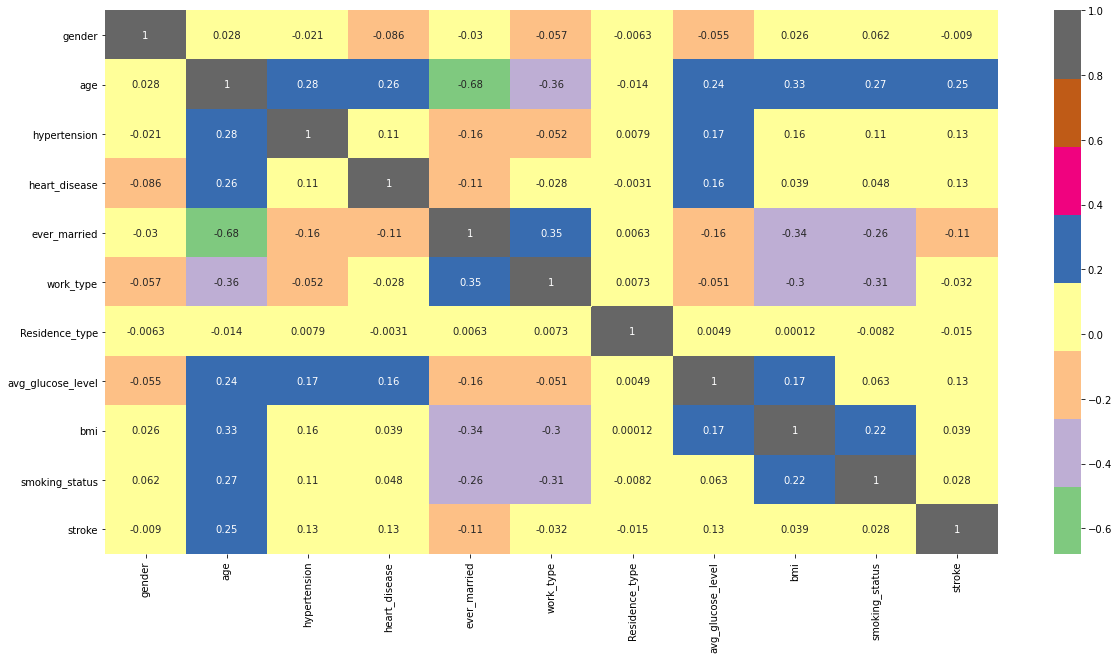

In [11]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="Accent",annot=True)
plt.show()

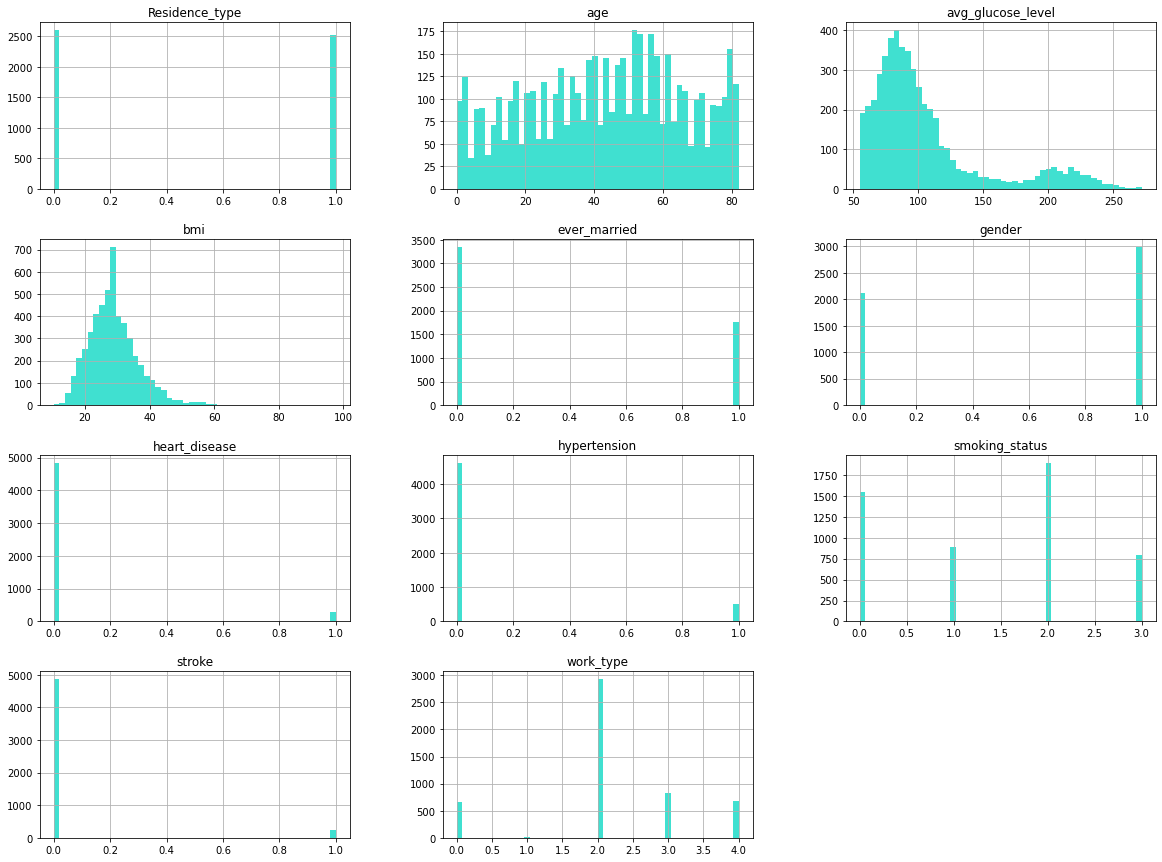

In [12]:
df.hist(bins=50, figsize=(20,15), color = 'Turquoise')
plt.show()

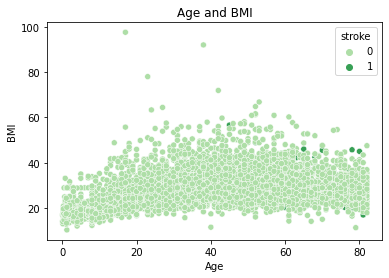

<Figure size 720x720 with 0 Axes>

In [13]:
sns.scatterplot(x=df['age'],y=df['bmi'], hue=df['stroke'], palette="Greens")
plt.title('Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.figure(figsize=(10,10))
plt.show()

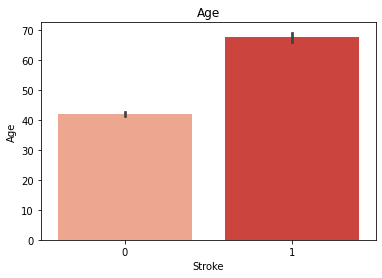

In [14]:
sns.barplot(x =df['stroke'], y=df['age'],palette="Reds")
plt.title('Age')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

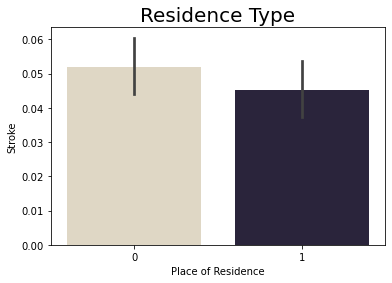

0 = urban 1 = rural


In [15]:
sns.barplot(x=df['Residence_type'], y=df['stroke'],palette="ch:s=-.2,r=.6")
plt.title('Residence Type', fontsize = 20)
plt.xlabel('Place of Residence')
plt.ylabel('Stroke')
plt.show()
print('0 = urban','1 = rural')

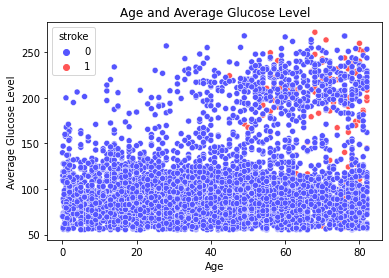

In [16]:
sns.scatterplot(x=df['age'],y=df['avg_glucose_level'], hue=df['stroke'], palette='seismic')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title('Age and Average Glucose Level')
plt.show()

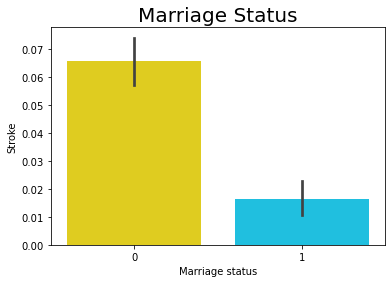

0 = not married 1 = married


In [17]:
sns.barplot(x=df['ever_married'],y=df['stroke'],palette="jet_r")
plt.title('Marriage Status', fontsize = 20)
plt.xlabel('Marriage status')
plt.ylabel('Stroke')
plt.show()
print('0 = not married','1 = married')

Let's check how many unknown smoking values there are

In [18]:
k = df['smoking_status']==0
k.value_counts()

False    3566
True     1544
Name: smoking_status, dtype: int64

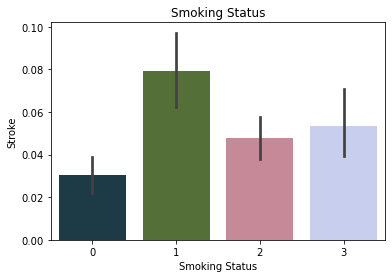

0 = unknown 1 = formerly 2 = never 3 = smokes


In [19]:
sns.barplot(x=df['smoking_status'], y=df['stroke'],palette="cubehelix")
plt.xlabel('Smoking Status')
plt.ylabel('Stroke')
plt.title('Smoking Status')
plt.show()
print('0 = unknown','1 = formerly','2 = never','3 = smokes')

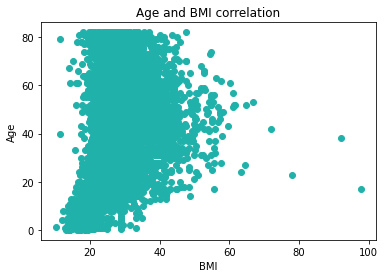

In [20]:
plt.scatter(x=df['bmi'],y=df['age'],color='lightseagreen')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('Age and BMI correlation')
plt.show()

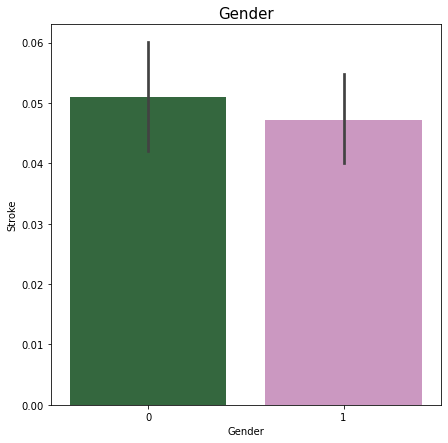

0 = male 1 = female


In [21]:
plt.figure(figsize = (7, 7))
sns.barplot(x=df['gender'],y=df['stroke'],palette = "cubehelix")
plt.title('Gender', fontsize = 15)
plt.xlabel('Gender')
plt.ylabel('Stroke')
plt.show()
print('0 = male','1 = female')

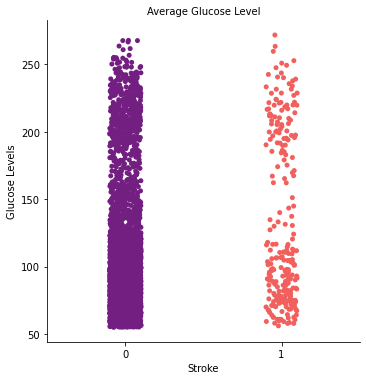

In [22]:
sns.catplot(x="stroke", y="avg_glucose_level", data=df, palette = "magma")
plt.title('Average Glucose Level', fontsize = 10)
plt.xlabel('Stroke')
plt.ylabel('Glucose Levels')
plt.show()

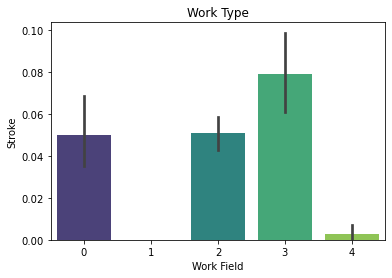

0 = government job 1 = never worked 2 = private 3 = self-employed 4 = children


In [23]:
sns.barplot(x=df['work_type'], y=df['stroke'],palette="viridis")
plt.title('Work Type')
plt.xlabel('Work Field')
plt.ylabel('Stroke')
plt.show()
print('0 = government job','1 = never worked','2 = private','3 = self-employed','4 = children')

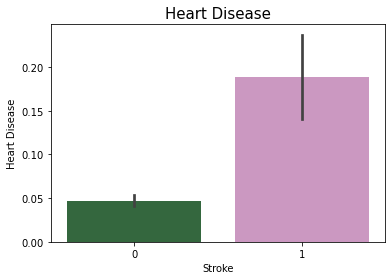

0 = no 1 = yes


In [24]:
sns.barplot(x="stroke", y="heart_disease", data=df, palette = "cubehelix")
plt.title('Heart Disease', fontsize = 15)
plt.xlabel('Stroke')
plt.ylabel('Heart Disease')
plt.show()
print('0 = no','1 = yes')

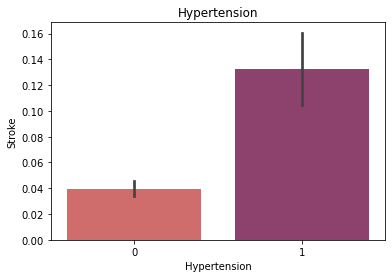

0 = no 1 = yes


In [25]:
sns.barplot(x=df['hypertension'], y=df['stroke'],palette='flare')
plt.title('Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Stroke')
plt.show()
print('0 = no','1 = yes')

### Divide data into training and testing sets

In [26]:
x = df.drop('stroke', axis = 1)
y = df.stroke
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

Confusion Matrix Chart

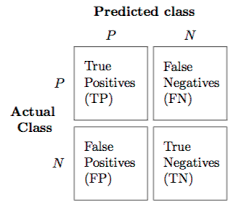

### Dummy Classifier

In [27]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(x_train,y_train)
pred = dummy_clf.predict(x_test)
dummy_a=dummy_clf.score(y_test, pred)
print(dummy_a)

0.9070450097847358


Let's check the Dummy Classifier's results

#### Confusion Matrix:

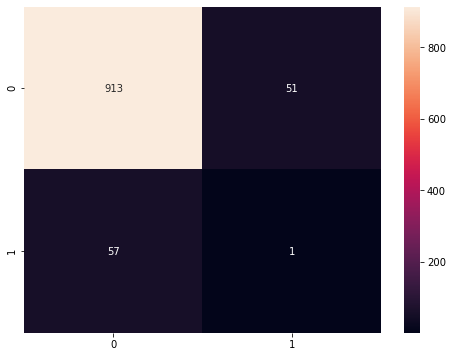

In [28]:
con_mat = confusion_matrix(y_test, pred)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

### This makes sense since only a small amount of the people in the data actually had strokes.

#### ROC Curve:

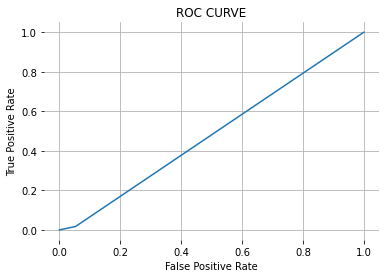

The score ROC Curve is: 48.199999999999996%


In [29]:
false_positive_rate, true_positiv_rate, _= roc_curve(y_test, pred)
auc= roc_auc_score(y_test, pred)
plt.plot(false_positive_rate, true_positiv_rate, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()
 
print(f"The score ROC Curve is: {round(auc,3)*100}%")

### Decision Tree Classifier

In [30]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
predict = clf.predict(x_test)
decision_a=accuracy_score(y_test, predict)
print(decision_a)

0.9080234833659491


Let's check the Decision Tree Classifier's results

#### Confusion Matrix:

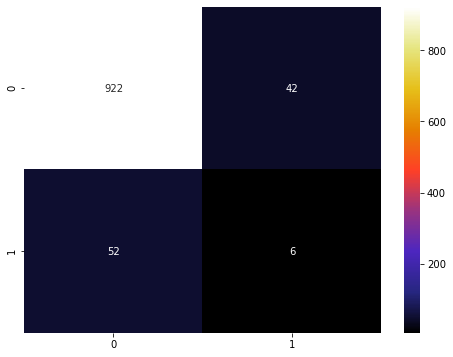

In [31]:
con_mat = confusion_matrix(y_test, predict)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, cmap="CMRmap", fmt = 'g')
plt.show()

#### ROV Curve:

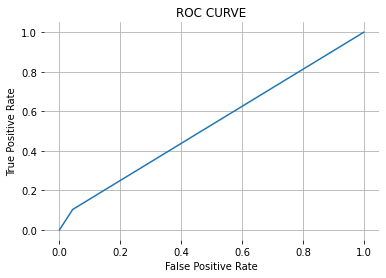

The score ROC Curve is: 53.0%


In [32]:
false_positive_rate, true_positiv_rate, _= roc_curve(y_test, predict)
auc= roc_auc_score(y_test, predict)
plt.plot(false_positive_rate, true_positiv_rate, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()
 
print(f"The score ROC Curve is: {round(auc,3)*100}%")

### KNN Classifier

In [33]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
knn_a=accuracy_score(y_test, prediction)
print(knn_a)

0.9422700587084148


Let's look at a range of k values

In [34]:
for i in range(1,10):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    prediction2 = knn2.predict(x_test)
    print ("For k =", i ,":", metrics.accuracy_score(y_test, prediction2))

For k = 1 : 0.9060665362035225
For k = 2 : 0.9393346379647749
For k = 3 : 0.9256360078277887
For k = 4 : 0.9403131115459883
For k = 5 : 0.9344422700587084
For k = 6 : 0.9422700587084148
For k = 7 : 0.9373776908023483
For k = 8 : 0.9422700587084148
For k = 9 : 0.9412915851272016


The k values accuracy as a curve

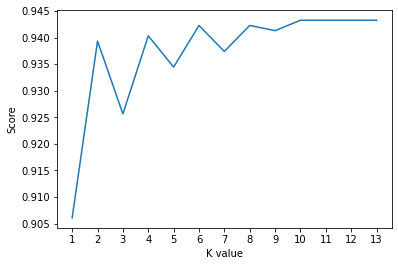

In [35]:
arr = []
for i in range(1,14):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    prediction2 = knn2.predict(x_test)
    arr.append(accuracy_score(y_test, prediction2))
    
plt.plot(range(1,14), arr)
plt.xticks(np.arange(1,14,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

We can see that the optimal k value is k = 8

Let's check the KNN Classifier's results

#### Confusion Matrix:

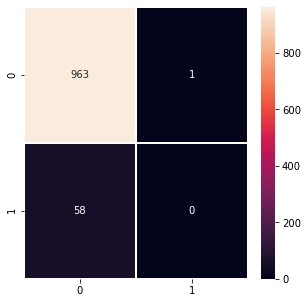

In [36]:
confusion = metrics.confusion_matrix(y_test, prediction)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(confusion,annot = True, linewidth = 0.5, fmt = ".0f", ax = ax)
plt.show()

#### ROC Curve:

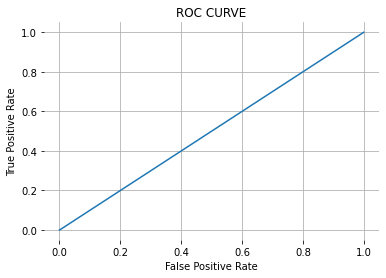

The score ROC Curve is: 49.9%


In [37]:
false_positive_rate, true_positiv_rate, _= roc_curve(y_test, prediction)
auc= roc_auc_score(y_test, prediction)
plt.plot(false_positive_rate, true_positiv_rate, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()
 
print(f"The score ROC Curve is: {round(auc,3)*100}%")

### Logistic Regression

In [73]:
logreg = LogisticRegression(max_iter=150)
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_a = accuracy_score(y_test, logreg_predict)
print(logreg_a)

0.9432485322896281


Let's check the Logistic Regression's results

#### Confusion Matrix:

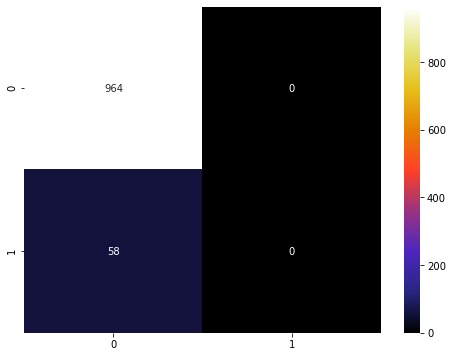

In [39]:
con_mat = confusion_matrix(y_test, logreg_predict)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, cmap="CMRmap", fmt = 'g')
plt.show()

#### ROC Curve:

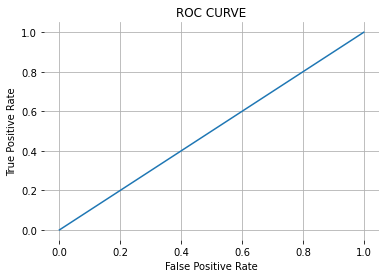

The score ROC Curve is: 50.0%


In [40]:
false_positive_rate, true_positiv_rate, _= roc_curve(y_test, logreg_predict)
auc= roc_auc_score(y_test, logreg_predict)
plt.plot(false_positive_rate, true_positiv_rate, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()
print(f"The score ROC Curve is: {round(auc,3)*100}%")

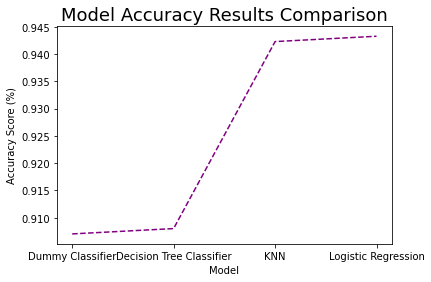

In [41]:
arrX = ['Dummy Classifier','Decision Tree Classifier','KNN', 'Logistic Regression']
arrY = [ dummy_a,decision_a,knn_a, logreg_a]
plt.plot (arrX, arrY, linestyle='--',color='purple')
plt.title("Model Accuracy Results Comparison", fontsize = 18)
plt.xlabel("Model")
plt.ylabel("Accuracy Score (%)")
plt.show()

The end.

# Term 2

## Let's work to improve the results

Let's refresh our memories on last term's results:

In [74]:
data=[[0.907,0.908,0.941,0.943]]
models=["Dummy","Decision Tree", "KNN", "Logistic Regression"]
pd.DataFrame(data, columns = models , index=["Accuracy Score (%)"])

,Dummy,Decision Tree,KNN,Logistic Regression
Accuracy Score (%),0.907,0.908,0.941,0.943


## Let's try and improve the results using the Voting and Stacking Classifier Ensemble Learning models

In [44]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

In [56]:
r1 = LogisticRegression()
r2 = DecisionTreeClassifier()
r3 = KNeighborsClassifier()
r4 = AdaBoostClassifier()
r5 = GradientBoostingClassifier()
r6 = RandomForestClassifier(n_estimators=10, random_state=42)
r7 = make_pipeline(StandardScaler(),LinearSVC(random_state=1, tol=1e-5))

### Voting Classifier

In [75]:
vr = VotingClassifier([('lr', r1), ('dt', r2),('knn', r3),('ab', r4) , ('xgb', r5), ('rfc',r6),('mpp', r7)])
vr.fit(x_train,y_train)
vr_pred = vr.predict(x_test)
vr_a=accuracy_score(y_test, vr_pred)
print("Accuracy: ", accuracy_score(y_test, vr_pred))

Accuracy:  0.9422700587084148


#### Confusion Matrix:

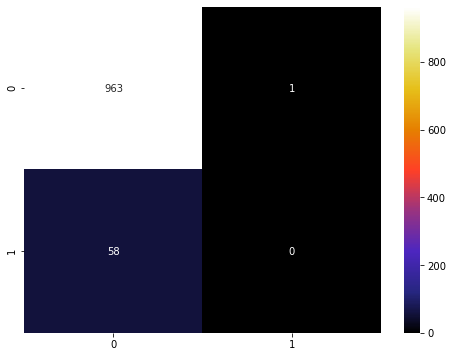

In [57]:
con_mat = confusion_matrix(y_test, vr_pred)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, cmap="CMRmap", fmt = 'g')
plt.show()

### Stacking Classifier

In [102]:
estimators = [('lr', r1), ('dt', r2),('knn', r3),('ab', r4) , ('xgb', r5), ('rfc',r6),('mpp', r7)]
sc=StackingClassifier(estimators)
sc.fit(x_train,y_train)
sc_pred = sc.predict(x_test)
sc_a=accuracy_score(y_test, sc_pred)
print("Accuracy: ", accuracy_score(y_test, sc_pred))

Accuracy:  0.9432485322896281


#### Confusion Matrix:

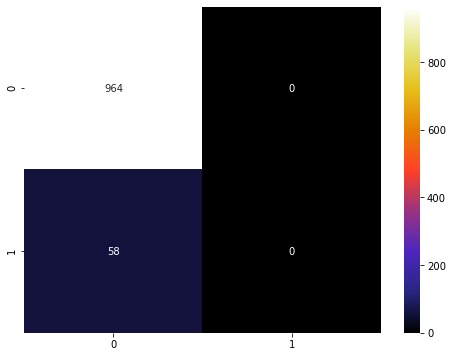

In [58]:
con_mat = confusion_matrix(y_test, sc_pred)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, cmap="CMRmap", fmt = 'g')
plt.show()

### Adaboost Classifier

In [47]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
ada_pred = ada.predict(x_test)
ada_a=accuracy_score(y_test, ada_pred)
print("Accuracy: ", accuracy_score(y_test, ada_pred))

Accuracy:  0.9422700587084148


#### Confusion Matrix:

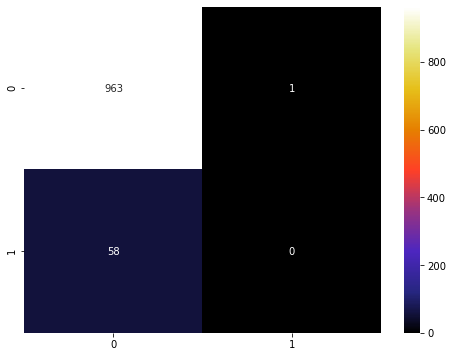

In [59]:
con_mat = confusion_matrix(y_test, ada_pred)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, cmap="CMRmap", fmt = 'g')
plt.show()

### Gradient Boosting Classifier

In [48]:
gsc = GradientBoostingClassifier()
gsc.fit(x_train,y_train)
gsc_pred = gsc.predict(x_test)
gsc_a=accuracy_score(y_test, gsc_pred)
print("Accuracy: ", accuracy_score(y_test, gsc_pred))

Accuracy:  0.9412915851272016


#### Confusion Matrix:

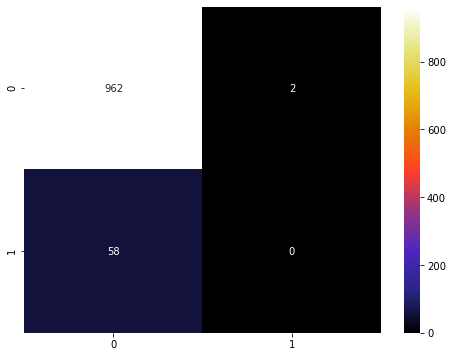

In [60]:
con_mat = confusion_matrix(y_test, gsc_pred)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, cmap="CMRmap", fmt = 'g')
plt.show()

### Bagging Classifier

In [49]:
bag =BaggingClassifier(n_estimators=200, max_features= 1, max_samples= 3, n_jobs= 1, random_state=4)
bag.fit(x_train, y_train)
bag_pred= bag.predict(x_test)
bag_a=accuracy_score(y_test, bag_pred)
print("Accuracy: ", accuracy_score(y_test, bag_pred))

Accuracy:  0.9432485322896281


#### Confusion Matrix:

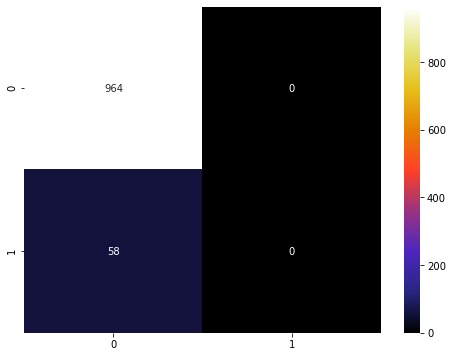

In [61]:
con_mat = confusion_matrix(y_test, bag_pred)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, cmap="CMRmap", fmt = 'g')
plt.show()

In summary:

## Model Accuracy Results Comparison

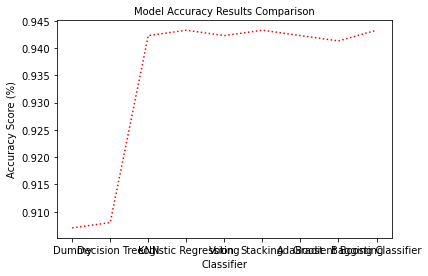

<Figure size 864x864 with 0 Axes>

In [97]:
arrX = ['Dummy','Decision Tree','KNN', 'Logistic Regression', 'Voting', 'Stacking', 'AdaBoost', 'Gradient Boosting', 'Bagging Classifier']
arrY = [ dummy_a,decision_a,knn_a, logreg_a, vr_a, sc_a, ada_a, gsc_a, bag_a]
plt.plot ( arrX, arrY, linestyle=':',color='red')
plt.title("Model Accuracy Results Comparison", fontsize = 10)
plt.xlabel("Classifier", fontsize=10)
plt.ylabel("Accuracy Score (%)")
plt.figure(figsize=(12,12), facecolor='w', edgecolor='k')

plt.show()

In [90]:
data=[[dummy_a*100,decision_a*100,knn_a*100, logreg_a*100, vr_a*100, sc_a*100, ada_a*100, gsc_a*100, bag_a*100]]
models=['Dummy','Decision Tree','KNN', 'Logistic Regression', 'Voting', 'Stacking', 'AdaBoost', 'Gradient Boosting', 'Bagging Classifier']
pd.DataFrame(data, columns = models , index=["Accuracy Score (%)"])

,Dummy,Decision Tree,KNN,Logistic Regression,Voting,Stacking,AdaBoost,Gradient Boosting,Bagging Classifier
Accuracy Score (%),90.704501,90.802348,94.227006,94.324853,94.227006,94.324853,94.227006,94.129159,94.324853


In [91]:
list=[]
for i in range(0,8):
    m = data[0][i]
    list.append(m)  

print("Greatest accuracy:",max(list))

Greatest accuracy: 94.32485322896281


### As shown in the graph, we didn't really succeed in improving the prediction accuracy.
### The highest accuracy is 94.3% in the Stacking Classifier, similar to the highest result from last term.

The end.